<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Knn" data-toc-modified-id="Knn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Knn</a></span><ul class="toc-item"><li><span><a href="#Bonus:-scaling" data-toc-modified-id="Bonus:-scaling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bonus: scaling</a></span></li></ul></li></ul></div>

**Obiettivo:** creare un modello predittivo per risolvere un problema di classificazione attraverso l'utilizzo di KNN, seguendo la pipeline vista a lezione.
 

**Dataset:**
Il dataset da utilizzare contiene i risultati dell’analisi chimica di vini prodotti da tre diversi coltivatori Italiani: dovrai capire il tipo di vino a partire dai suoi valori chimici.

Puoi caricare il dataset direttamente dalla libreria di Scikit-learn: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset.

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.datasets import load_wine

wine = load_wine() 
X = wine['data']
y = wine['target']

df = pd.DataFrame(X, columns=wine['feature_names'])
df['target'] = wine['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## Load data

In [7]:
wine = load_wine() # returns a dict of different types of data
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
X = wine['data']
y = wine['target']

df = pd.DataFrame(X, columns=wine['feature_names'])
df['target'] = wine['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
df['target'].value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

<AxesSubplot:>

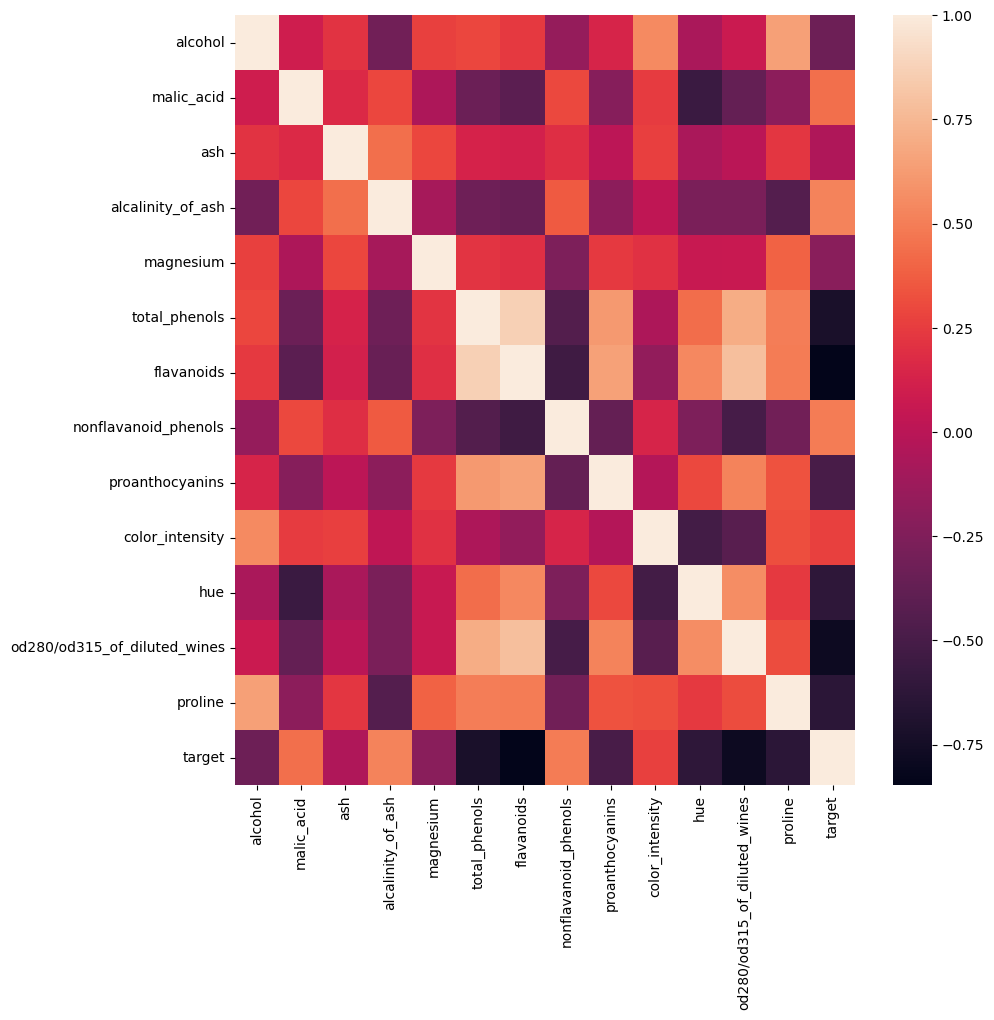

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

## Knn

In [51]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#function
def train_test_rmse(x,y):
    x = Iris_data[x]
    y = Iris_data[y]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(accuracy_score(y_test, y_pred))  # or you can save it in variable and return it 
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [52]:
y_pred

array([0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1])

In [53]:
(y_pred == y_test).sum()/len(y_test)

0.6111111111111112

In [54]:
(y_pred == y_test).sum()/len(y_test)

0.6111111111111112

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_pred, y_test)

0.6111111111111112

In [57]:
# create model
knn = KNeighborsClassifier(n_neighbors=3)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)


# evaluate manually
acc = (y_pred == y_test).sum()/len(y_test)
print('Accuracy in test (manual)', acc)


# or automathically
acc = knn.score(X_test, y_test)
print('Accuracy in test (auto)', acc)

Accuracy in test (manual) 0.6111111111111112
Accuracy in test (auto) 0.6111111111111112


Wall time: 4.52 s


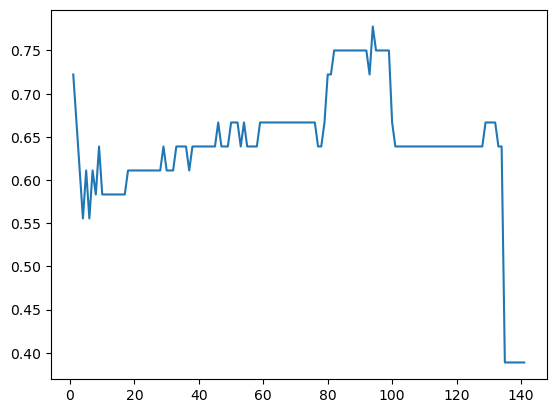

In [58]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# what's the best number of neighbours?
accs = []
nns = range(1, len(X_train))
for n in nns:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    accs.append(knn.score(X_test, y_test))
    
plt.plot(nns,accs)

In [59]:
# what's the best metric?

from sklearn.metrics.pairwise import distance_metrics

distances = distance_metrics().keys()
distances

dict_keys(['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean'])

Distance haversine gave the following error: Haversine distance only valid in 2 dimensions
Distance precomputed gave the following error: Precomputed matrix must be square. Input is a 142x13 matrix.


<BarContainer object of 7 artists>

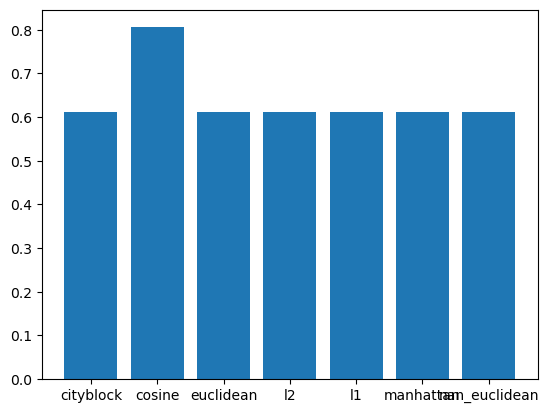

In [60]:
tested_distances = []
accs = []
for d in distances:
    try:
        knn = KNeighborsClassifier(metric=d)
        knn.fit(X_train, y_train)
        accs.append(knn.score(X_test, y_test))
        tested_distances.append(d)
    except ValueError as err:
        print(f'Distance {d} gave the following error:',err)
        
plt.bar(tested_distances,accs)

In [61]:
%%time
experiments = []
nns = range(1, len(X_train))
for n in nns:
    for d in tested_distances:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train)
        acc = knn.score(X_test, y_test)
        experiments.append({'n_neighbours':n, 'distance_metric':d, 'accuracy':acc})

Wall time: 20.8 s


In [62]:
df_exp = pd.DataFrame(experiments)
df_exp

,n_neighbours,distance_metric,accuracy
0,1,cityblock,0.750000
1,1,cosine,0.833333
2,1,euclidean,0.722222
3,1,l2,0.722222
4,1,l1,0.750000
...,...,...,...
982,141,euclidean,0.388889
983,141,l2,0.388889
984,141,l1,0.388889
985,141,manhattan,0.388889


In [63]:
df_exp.sort_values('accuracy', ascending=False)

,n_neighbours,distance_metric,accuracy
71,11,cosine,0.833333
1,1,cosine,0.833333
15,3,cosine,0.833333
99,15,cosine,0.805556
134,20,cosine,0.805556
...,...,...,...
956,137,l1,0.388889
957,137,manhattan,0.388889
958,137,nan_euclidean,0.388889
959,138,cityblock,0.388889


<AxesSubplot:xlabel='distance_metric', ylabel='n_neighbours'>

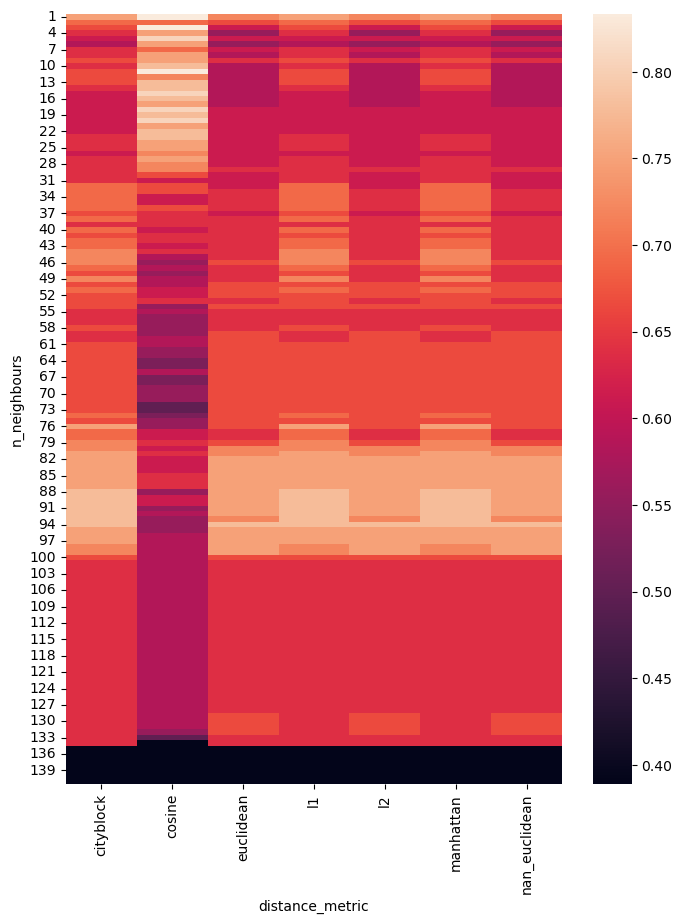

In [64]:
plt.figure(figsize=(8,10))
exp_pivot = df_exp.pivot(index='n_neighbours', columns='distance_metric', values='accuracy')
sns.heatmap(exp_pivot)

### Bonus: scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [66]:
pd.DataFrame(scaler.fit_transform(df)).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
%%time
experiments = []
nns = range(1, len(X_train))
for n in nns:
    for d in tested_distances:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train)
        acc = knn.score(X_test, y_test)
        experiments.append({'n_neighbours':n, 'distance_metric':d, 'accuracy':acc})

Wall time: 20.7 s


In [68]:
df_exp = pd.DataFrame(experiments).sort_values('accuracy', ascending=False)
df_exp

,n_neighbours,distance_metric,accuracy
243,35,manhattan,1.000000
82,12,manhattan,1.000000
98,15,cityblock,1.000000
166,24,manhattan,1.000000
96,14,manhattan,1.000000
...,...,...,...
877,126,euclidean,0.388889
878,126,l2,0.388889
879,126,l1,0.388889
880,126,manhattan,0.388889


<AxesSubplot:xlabel='distance_metric', ylabel='n_neighbours'>

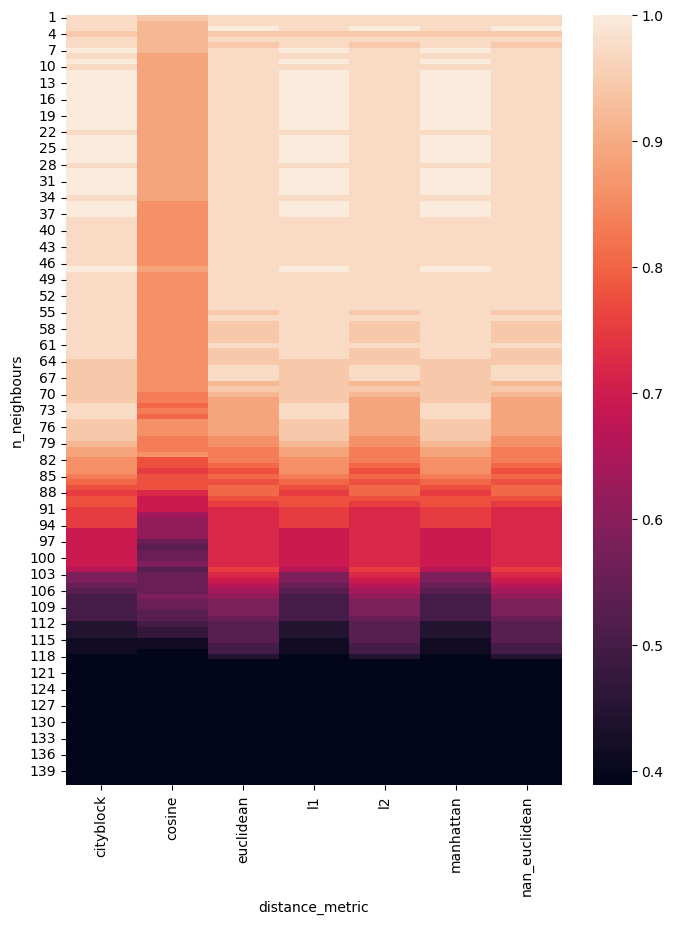

In [69]:
plt.figure(figsize=(8,10))
exp_pivot = df_exp.pivot(index='n_neighbours', columns='distance_metric', values='accuracy')
sns.heatmap(exp_pivot)